# SARS-CoV-2 Variants Classification using Machine Learning

## Setup

### Importing libraries

In [1]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import utilities as utils
from sklearn.metrics import pairwise_distances
%matplotlib widget

## Data Engineering

### Data wrangling and cleaning

In [2]:
path = os.path.join('Asn2DataSet','TrainingDataset')
alphas = [utils.read_sequence(os.path.join(path, 'Alpha', seq)) for seq in os.listdir(os.path.join(path,'Alpha'))]
alphas = utils.clean_fasta(alphas)
betas = [utils.read_sequence(os.path.join(path, 'Beta', seq)) for seq in os.listdir(os.path.join(path,'Beta'))]
betas = utils.clean_fasta(betas)
deltas = [utils.read_sequence(os.path.join(path, 'Delta', seq)) for seq in os.listdir(os.path.join(path,'Delta'))]
deltas = utils.clean_fasta(deltas)
gammas = [utils.read_sequence(os.path.join(path, 'Gamma', seq)) for seq in os.listdir(os.path.join(path,'Gamma'))]
gammas = utils.clean_fasta(gammas)

### Data pre-processing

In [3]:
cgrs = []
labels = []
for seq in alphas:
    tmp = utils.cgr(seq, 'ACGT', 7)
    cgrs.append(tmp)
    labels.append('Alpha')

for seq in betas:
    tmp = utils.cgr(seq, 'ACGT', 7)
    cgrs.append(tmp)
    labels.append('Beta')

for seq in deltas:
    tmp = utils.cgr(seq, 'ACGT', 7)
    cgrs.append(tmp)
    labels.append('Delta')

for seq in gammas:
    tmp = utils.cgr(seq, 'ACGT', 7)
    cgrs.append(tmp)
    labels.append('Gamma')

cgrs = np.array(cgrs)
labels = np.array(labels)

In [4]:
cgr_vectors = np.array([mat.flatten() for mat in cgrs])
normalized_cgr_vectors = np.array([vector/np.max(vector) for vector in cgr_vectors])

In [5]:
label_map = {label: i for i,label in enumerate(np.unique(labels))}
dummy_labels = np.array([label_map[lab] for lab in labels])

In [6]:
numerical_to_label = {val: key for key,val in label_map.items()}

In [7]:
variants_dict = {variant: np.sum(cgrs[np.where(labels== variant)], axis=0) for variant in np.unique(labels)}

## Exploratory Data Analysis

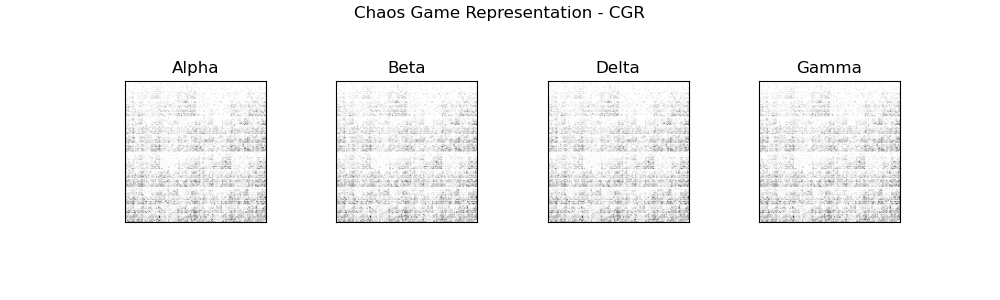

In [8]:
fig,ax = plt.subplots(1,4, figsize=(10,3))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle('Chaos Game Representation - CGR')
for i,variant in enumerate(variants_dict):
    ax[i].imshow(variants_dict[variant], cmap='gray_r')
    ax[i].set_title(variant)
    ax[i].set_yticks([])
    ax[i].set_xticks([])
plt.show()


In [9]:
D = pairwise_distances([mat.flatten() for mat in cgrs], metric='manhattan')

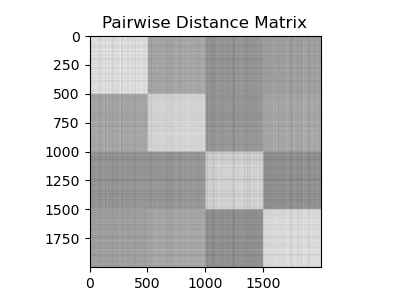

In [11]:
plt.figure(figsize=(4,3))
plt.imshow(D, cmap='gray_r')
plt.title('Pairwise Distance Matrix')
plt.show()

In [71]:
reduced = utils.perform_mds(D, 3, 99)

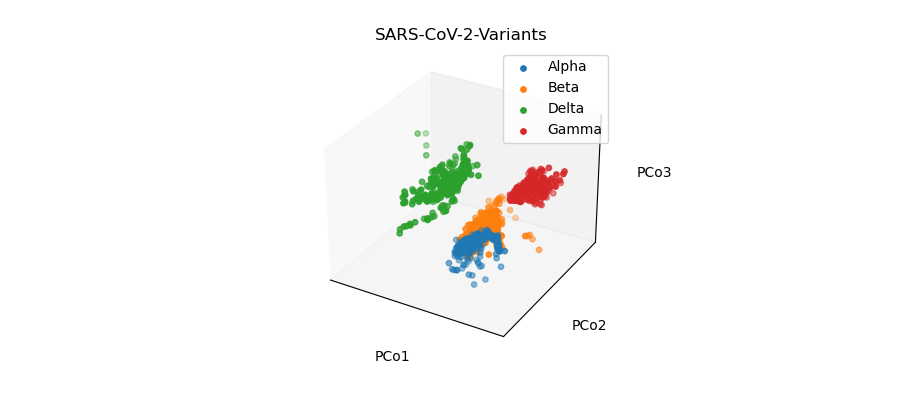

In [84]:
utils.plot_3d(reduced, labels)